In [1]:
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from PIL import Image, ImageFilter
import os
from IPython.display import display
import random
import matplotlib.pyplot as plt

D:\Programmes\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data

[Download Data from Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data)

In [2]:
def processImages(size, path):
    
    if not os.path.exists('new_train'):
        os.makedirs('new_train')
    
    timeNow = datetime.datetime.now()
    
    for file in os.listdir(path):
        img = Image.open(path + '/' + file)
        
        # Resizing
        img = img.resize(size)
        # Greyscale
        img = img.convert('L')
        
        img.save('new_train/' + file, 'JPEG')
    
    print("Temps écoulés : " + str(datetime.datetime.now() - timeNow))
    
def getInputs(path, list_input):
    
    timeNow = datetime.datetime.now()
    
    for file in os.listdir(path):
        img = Image.open(path + '/' + file)
        
        pixels = list(img.getdata())
        width, height = img.size
        pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]
    
        list_input.append(pixels)
        
    print("Temps écoulés : " + str(datetime.datetime.now() - timeNow))
    
def getLabels(list_label, path):
    
    timeNow = datetime.datetime.now()
    
    for file in os.listdir(path):
        
        file_split = file.split('.')[0]
        
        if file_split == 'cat':
            file_split = [1,0]
        elif file_split == 'dog':
            file_split = [0,1]
        
        list_label.append(file_split)
        
    print("Temps écoulés : " + str(datetime.datetime.now() - timeNow))

In [14]:
processImages((50,50), 'train')

Temps écoulés : 0:02:00.274502


In [3]:
list_input = []
list_label = []

getLabels(list_label, 'train')
getInputs('new_train', list_input)

Temps écoulés : 0:00:00.040023
Temps écoulés : 0:00:22.531789


In [4]:
X_train = np.array(list_input)
Y_train = np.array(list_label)

[1 0]


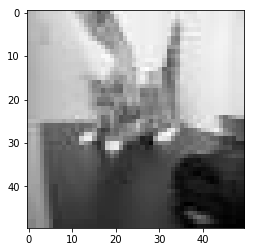

[1 0]


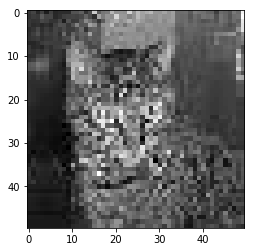

[1 0]


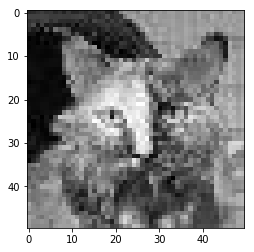

[1 0]


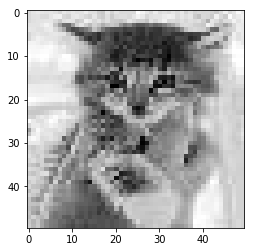

[1 0]


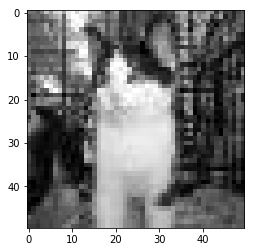

[1 0]


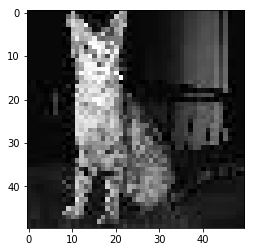

[1 0]


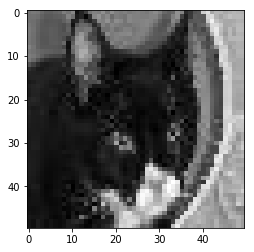

[1 0]


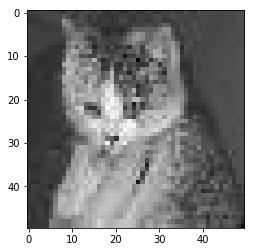

[1 0]


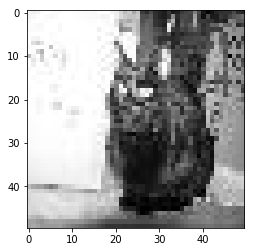

[1 0]


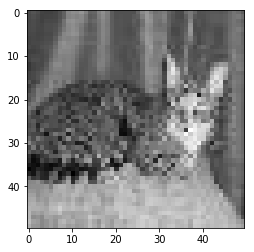

In [5]:
for i in range(10):
    index = np.random.random(len(X_train))
    plt.imshow(X_train[i], cmap='gray')
    print(Y_train[i])
    plt.show()

# OLD

In [ ]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, [None, 50, 50])
    W = tf.Variable(tf.zeros([2500, 2]))
    b = tf.Variable(tf.zeros([2]))

    Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 2500]), W) + b)

    Y_ = tf.placeholder(tf.float32, [None, 2])

    cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

    is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.03)
    train_step = optimizer.minimize(cross_entropy)

# NEW

## No Hidden Layer

In [6]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, [None, 50, 50])
    X_reshaped = tf.reshape(X, [-1, 2500])
    X_scaled = tf.nn.l2_normalize(X_reshaped, 1)

    W1 = tf.Variable(tf.truncated_normal([2500, 2]))
    b1 = tf.Variable(tf.zeros([2]))

    Y = tf.matmul(X_scaled, W1) + b1

    Y_ = tf.placeholder(tf.float32, [None, 2])

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Y))

    optimizer = tf.train.GradientDescentOptimizer(0.5)
    train_step = optimizer.minimize(cross_entropy)

    is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## 1 Hidden Layer

In [13]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, [None, 50, 50])
    X_reshaped = tf.reshape(X, [-1, 2500])
    X_scaled = tf.nn.l2_normalize(X_reshaped, 1)

    W1 = tf.Variable(tf.truncated_normal([2500, 500]))
    b1 = tf.Variable(tf.zeros([500]))
    
    W2 = tf.Variable(tf.truncated_normal([500, 2]))
    b2 = tf.Variable(tf.zeros([2]))

    h1 = tf.matmul(X_scaled, W1) + b1

    Y = tf.matmul(h1, W2) + b2

    Y_ = tf.placeholder(tf.float32, [None, 2])

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Y))

    optimizer = tf.train.GradientDescentOptimizer(0.5)
    train_step = optimizer.minimize(cross_entropy)

    is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Deep NN

In [15]:
with tf.Graph().as_default() as graph:
    X = tf.placeholder(tf.float32, [batch_size, 50, 50])
    X_reshaped = tf.reshape(X, [-1, 50, 50, 1])
#     X_scaled = tf.nn.l2_normalize(X_reshaped, 1)
    X_scaled = tf.map_fn(tf.image.per_image_standardization, X_reshaped)

    W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 3]))
    b1 = tf.Variable(tf.zeros([3]))
    conv1 = tf.nn.conv2d(X_scaled , W1, [1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(conv1 + b1)
    h1 = tf.nn.max_pool(relu1, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

    W2 = tf.Variable(tf.truncated_normal([5, 5, 3, 8]))
    b2 = tf.Variable(tf.zeros([8]))
    conv2 = tf.nn.conv2d(h1 , W2, [1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(conv2 + b2)
    h2 = tf.nn.max_pool(relu2, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

    shape = h2.get_shape().as_list()
    reshape = tf.reshape(h2, [shape[0], shape[1] * shape[2] * shape[3]])
    W3 = tf.Variable(tf.truncated_normal([reshape.get_shape().as_list()[1], 64]))
    b3 = tf.Variable(tf.zeros([64]))
    h3 = tf.nn.relu(tf.matmul(reshape, W3) + b3)
    
    W4 = tf.Variable(tf.truncated_normal([64, 2]))
    b4 = tf.Variable(tf.zeros([2]))
    Y = tf.matmul(h3, W4) + b4

    Y_ = tf.placeholder(tf.float32, [None, 2])

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Y))

    optimizer = tf.train.AdamOptimizer(0.3)
    train_step = optimizer.minimize(cross_entropy)

    is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Training

In [11]:
batch_size = 64

In [12]:
def get_minibatch(batch_size, samples_id, training_size):
    if batch_size > len(samples_id):
        new_samples = list(range(training_size-1))
        random.shuffle(new_samples)
        samples_id.extend(new_samples)
    
    next_batch = samples_id[:batch_size]
    samples_id = samples_id[batch_size:]
    
    return next_batch, samples_id 

In [16]:
nb_steps = X_train.shape[0] // batch_size
nb_epochs = 50
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(nb_epochs):
        print("Epoch : " + str(epoch))
        ids = []
        for step in range(nb_steps):
            batch_ids, ids = get_minibatch(batch_size, ids, X_train.shape[0])
            batch_data = X_train[batch_ids, :]
            batch_labels = Y_train[batch_ids, :]
            
            train_data = {X: batch_data, Y_: batch_labels}

            sess.run(train_step, feed_dict=train_data)

            if step % 500 == 0:
                a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
                print("Minibatch loss at epoch %d and step %d: %f" % (epoch, step, c))
                print("Minibatch accuracy: %f" % a)

Epoch : 0
Minibatch loss at epoch 0 and step 0: 26519.238281
Minibatch accuracy: 0.593750
Epoch : 1
Minibatch loss at epoch 1 and step 0: 0.706096
Minibatch accuracy: 0.453125
Epoch : 2
Minibatch loss at epoch 2 and step 0: 0.695074
Minibatch accuracy: 0.484375
Epoch : 3
Minibatch loss at epoch 3 and step 0: 0.689923
Minibatch accuracy: 0.562500
Epoch : 4
Minibatch loss at epoch 4 and step 0: 0.675768
Minibatch accuracy: 0.640625
Epoch : 5
Minibatch loss at epoch 5 and step 0: 0.737979
Minibatch accuracy: 0.375000
Epoch : 6
Minibatch loss at epoch 6 and step 0: 0.712127
Minibatch accuracy: 0.437500
Epoch : 7
Minibatch loss at epoch 7 and step 0: 0.705869
Minibatch accuracy: 0.484375
Epoch : 8
Minibatch loss at epoch 8 and step 0: 0.704600
Minibatch accuracy: 0.453125
Epoch : 9
Minibatch loss at epoch 9 and step 0: 0.699124
Minibatch accuracy: 0.484375
Epoch : 10
Minibatch loss at epoch 10 and step 0: 0.682443
Minibatch accuracy: 0.609375
Epoch : 11
Minibatch loss at epoch 11 and step 0

KeyboardInterrupt: 